# 📊 Phoenix KE Mentorship Program – Tier 2 - Data Analytics Case Study

This notebook contains solutions to the Phoenix KE Mentorship Program Data Analytics Case Study.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

In [4]:
# Load the dataset
df = pd.read_csv("retail_sales_data.csv")
df.head()

,Store ID,Date,Total Sales,Region,Product Category,Units Sold
0,Store_7,12/26/2024,4080.97,Mombasa,Electronics,92
1,Store_4,10/12/2024,4895.46,Nairobi,Electronics,86
2,Store_8,9/29/2024,3363.09,Nairobi,Electronics,14
3,Store_5,3/2/2024,7602.29,Nairobi,Home & Living,71
4,Store_7,3/24/2024,5275.84,Nairobi,Electronics,86


## 🧼 Data Cleaning

In [5]:
# Overview
df.info()

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())

# Summary statistics
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Store ID          500 non-null    object 
 1   Date              500 non-null    object 
 2   Total Sales       500 non-null    float64
 3   Region            500 non-null    object 
 4   Product Category  500 non-null    object 
 5   Units Sold        500 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 23.6+ KB

Missing values:
 Store ID            0
Date                0
Total Sales         0
Region              0
Product Category    0
Units Sold          0
dtype: int64

Duplicate rows: 0


,Store ID,Date,Total Sales,Region,Product Category,Units Sold
count,500,500,500.000000,500,500,500.000000
unique,10,268,NaN,4,4,NaN
top,Store_1,1/1/2024,NaN,Mombasa,Clothing,NaN
freq,62,6,NaN,135,134,NaN
mean,NaN,NaN,5316.515760,NaN,NaN,49.254000
std,NaN,NaN,2791.164576,NaN,NaN,28.980843
min,NaN,NaN,544.000000,NaN,NaN,1.000000
25%,NaN,NaN,2799.700000,NaN,NaN,22.000000
50%,NaN,NaN,5429.340000,NaN,NaN,49.000000
75%,NaN,NaN,7746.085000,NaN,NaN,75.000000


In [6]:
# Convert date column if needed
df['Date'] = pd.to_datetime(df['Date'])


## 📊 Descriptive Analysis

Region
Nairobi    710256.84
Mombasa    710064.10
Nakuru     653163.53
Kisumu     584773.41
Name: Total Sales, dtype: float64


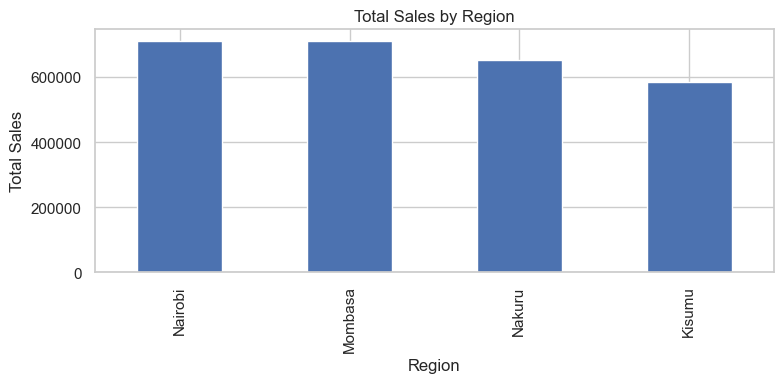

In [9]:
# Region with highest sales
region_sales = df.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)
print(region_sales)

# Plot
region_sales.plot(kind='bar', figsize=(8, 4), title='Total Sales by Region')
plt.ylabel("Total Sales")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

In [10]:
# Monthly average sales
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Sales'].sum()
average_monthly_sales = monthly_sales.mean()
print(f"Average monthly sales across all stores: {average_monthly_sales:.2f}")

Average monthly sales across all stores: 221521.49


## 📈 Visualizations

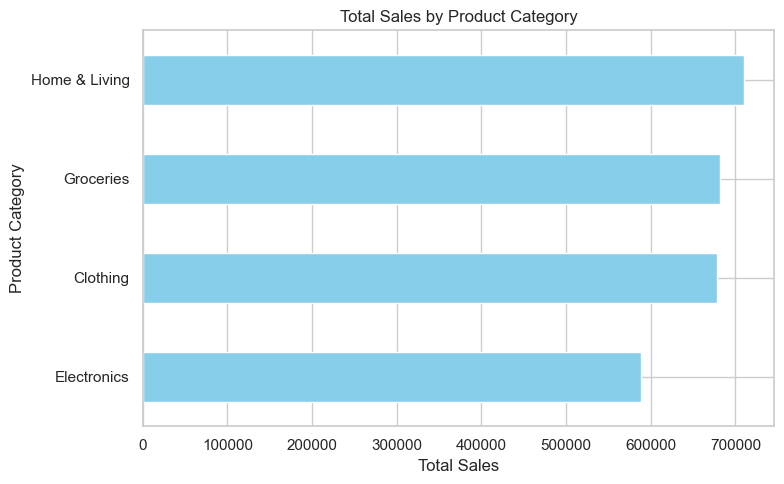

In [12]:
# Bar chart: total sales by product category
category_sales = df.groupby('Product Category')['Total Sales'].sum().sort_values()
category_sales.plot(kind='barh', figsize=(8, 5), color='skyblue', title='Total Sales by Product Category')
plt.xlabel("Total Sales")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

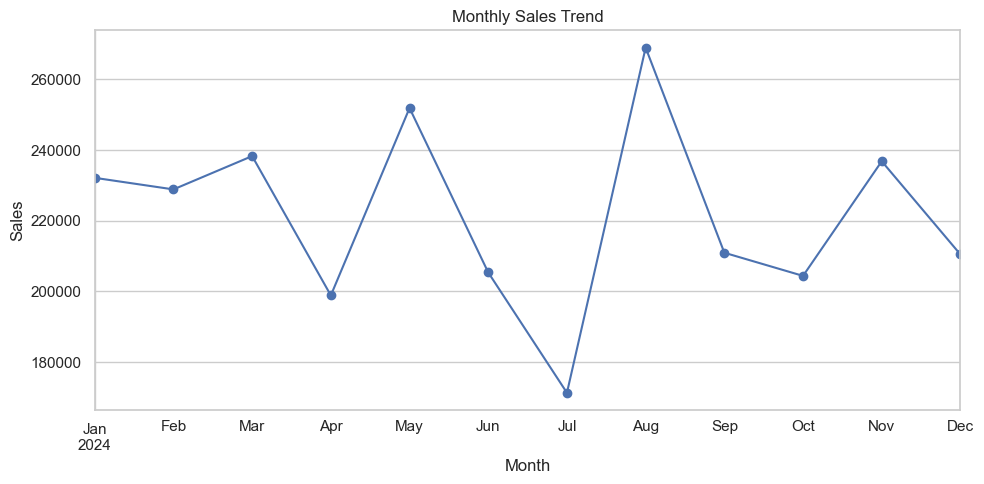

In [13]:
# Line chart: monthly sales trends
monthly_sales.plot(kind='line', marker='o', figsize=(10, 5), title='Monthly Sales Trend')
plt.ylabel("Sales")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

## 💡 Insight Summary

1. **Top-Performing Region:** The Nairobi region had the highest total sales, indicating strong performance and
 market demand.
2. **Product Category Trends:** Categories such as Furniture and Living drive the most revenue — focus marketing or inventory here.
3. **Seasonal Patterns:** Sales peak around the month of August – consider promotional campaigns during these periods.
